In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import imblearn.over_sampling

import pickle

In [3]:
df = pd.read_csv('PhotoSpec2_log.csv')

In [4]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,class_binary
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482,1
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097,1
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083,0
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437,1
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111,0


#### Imbalanced data

In [36]:
df['class'].value_counts()

GALAXY    16066
STAR       2558
QSO        1376
Name: class, dtype: int64

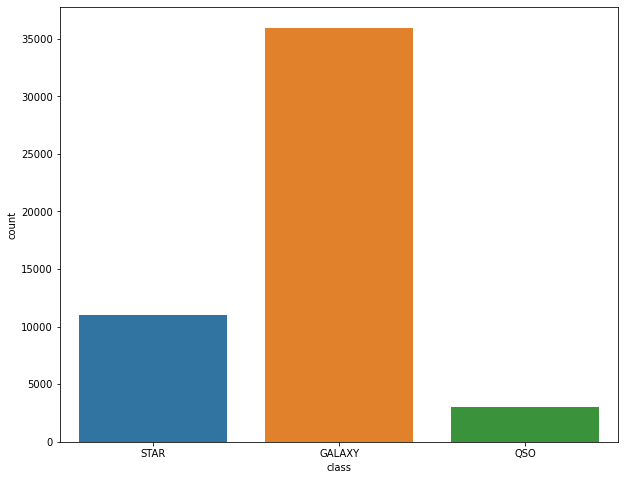

In [262]:
fig, ax=plt.subplots(figsize=(10,8))
sns.countplot(x= "class", data = df3)

In [264]:
class_bar.figure.savefig('class_bar', dpi=300)

#### Redshift may be a good feature to distinguish classes

Text(0, 0.5, 'Redshift')

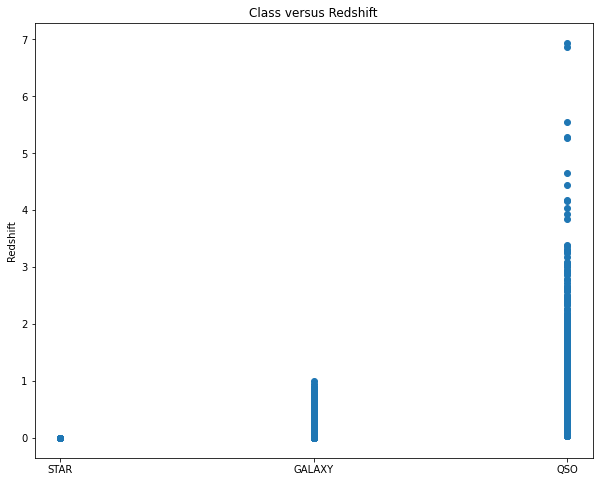

In [265]:
plt.figure(figsize=(10,8))
plt.scatter(df3['class'], df3['redshift'])
plt.title('Class versus Redshift')
plt.ylabel('Redshift')

In [266]:
plt.savefig('class_redshift', dpi=300)

<Figure size 432x288 with 0 Axes>

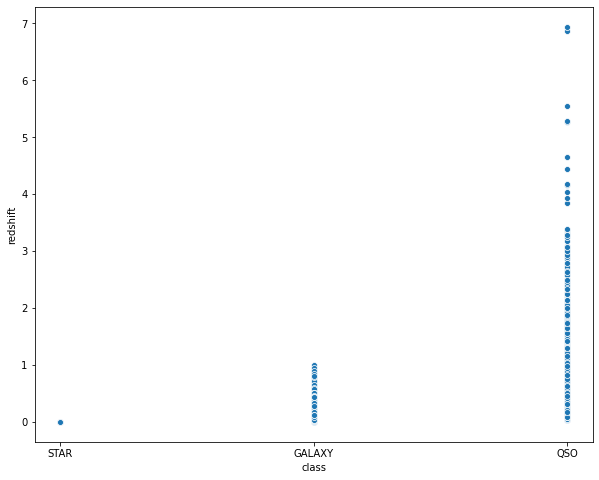

In [267]:
fig, ax=plt.subplots(figsize=(10,8))
class_redshift = sns.scatterplot(x='class', y='redshift', data = df3)

In [268]:
class_redshift.figure.savefig('class_redshift', dpi=300)

### Model with with all features

In [7]:
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'fiberid', 'run', 'camcol', 'field', 'plate', 'fiberid', 'log_redshift']

In [8]:
X = df[features]

In [10]:
X.head()

,ra,dec,u,g,r,i,z,fiberid,run,camcol,field,plate,fiberid,log_redshift
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,583,1402,6,83,1736,583,0.022482
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,591,1402,6,83,1736,591,0.053097
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,594,1402,6,83,1736,594,-0.000083
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,597,1402,6,84,1736,597,0.022437
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,4,3538,5,142,1739,4,0.000111


In [9]:
y = df['class']

In [11]:
#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

In [12]:
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [13]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]     
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
    svm=SVC(probability=True)
    svm.fit(X_train,y_train)
    
    lr=LogisticRegression(solver='liblinear')
    lr.fit(X_train,y_train)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    
    models = {'Naive Bayes': nb, 'SVM':svm, 'Logistic':lr, 'KNN': knn, 'Decision Tree':dt, 'Random Forest':rf}
    results = {'Naive Bayes': [], 'SVM':[], 'Logistic':[], 'KNN': [], 'Decision Tree':[], 'Random Forest':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Naive Bayes
Mean Accuracy: 0.8921875

SVM
Mean Accuracy: 0.8065625

Logistic
Mean Accuracy: 0.855

KNN
Mean Accuracy: 0.8021875

Decision Tree
Mean Accuracy: 0.9846875

Random Forest
Mean Accuracy: 0.99



In [14]:
rf.feature_importances_

array([0.01387235, 0.01394972, 0.07319539, 0.05617145, 0.06454427,
       0.08255128, 0.10390392, 0.00579515, 0.00384661, 0.00237092,
       0.00698472, 0.01329955, 0.00550328, 0.55401138])

In [17]:
feature_importance = dict(zip(features, list(rf.feature_importances_)))

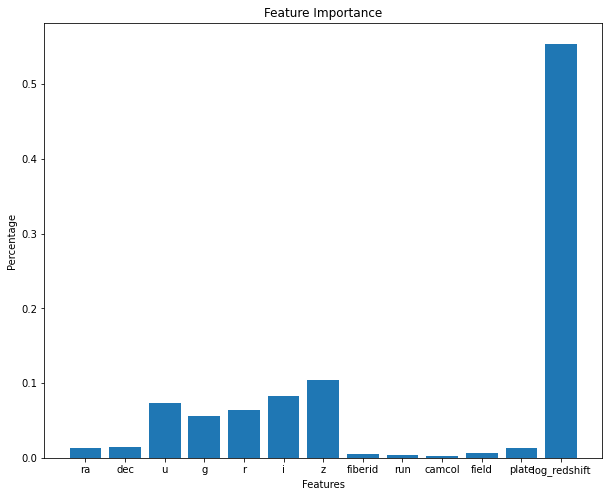

In [18]:
plt.figure(figsize=(10,8))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.title('Feature Importance')
plt.savefig('feature_importance.png',dpi=400)
plt.show()

The important features appear to be the bands and log_redshift.

### Model with bands and redshift

In [269]:
features = ['u', 'g', 'r', 'i', 'z', 'log_redshift']

In [270]:
X = df3[features]

In [271]:
y = df3['class']

In [272]:
X.head()

,u,g,r,i,z,log_redshift
0,16.54811,14.97662,14.29888,13.96458,13.82156,0.001638
1,19.84578,18.22822,17.41217,16.92843,16.57927,0.031207
2,17.90654,17.48691,17.39208,17.46770,17.31973,0.259359
3,20.24111,19.60741,19.25177,19.01723,18.92073,0.427337
4,19.36366,18.02443,17.68814,17.62313,17.29083,0.007425


In [273]:
#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

In [274]:
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [275]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]     
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
    svm=SVC(probability=True)
    svm.fit(X_train,y_train)
    
    lr=LogisticRegression(solver='liblinear')
    lr.fit(X_train,y_train)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    
    models = {'Naive Bayes': nb, 'SVM':svm, 'Logistic':lr, 'KNN': knn, 'Decision Tree':dt, 'Random Forest':rf}
    results = {'Naive Bayes': [], 'SVM':[], 'Logistic':[], 'KNN': [], 'Decision Tree':[], 'Random Forest':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Naive Bayes
Mean Accuracy: 0.973625

SVM
Mean Accuracy: 0.829625

Logistic
Mean Accuracy: 0.889375

KNN
Mean Accuracy: 0.9435

Decision Tree
Mean Accuracy: 0.98625

Random Forest
Mean Accuracy: 0.99125



In [289]:
results

{'Naive Bayes': [0.973625],
 'SVM': [0.829625],
 'Logistic': [0.889375],
 'KNN': [0.9435],
 'Decision Tree': [0.98625],
 'Random Forest': [0.99125]}

In [315]:
result_keys = ['Naive Bayes', 'SVM', 'Logistic', 'KNN', 'DT', 'Random Forest']

In [303]:
results.values()

dict_values([[0.973625], [0.829625], [0.889375], [0.9435], [0.98625], [0.99125]])

In [305]:
result_values = [0.973625, 0.829625, 0.889375, 0.9435, 0.98625, 0.99125]

In [296]:
feature_importance.values()

dict_values([0.08430072, 0.04835391, 0.06468642, 0.06674328, 0.09957781, 0.63633785])

In [316]:
plt.rcParams.update({'font.size': 18})

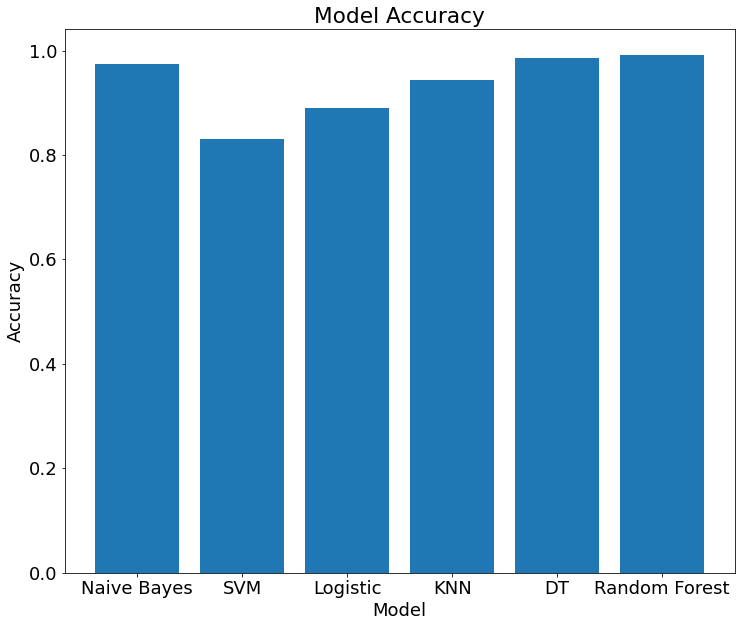

In [318]:
plt.figure(figsize=(12,10))
plt.bar(result_keys, result_values)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracy')
plt.savefig('model_accuracy.png',dpi=400)
plt.show()

In [186]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[3112    7   42]
 [  25  249    3]
 [ 151   14  397]]


In [187]:
y_test.value_counts()

GALAXY    3161
STAR       562
QSO        277
Name: class, dtype: int64

In [46]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,class_binary
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482,1
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097,1
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083,0
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437,1
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111,0


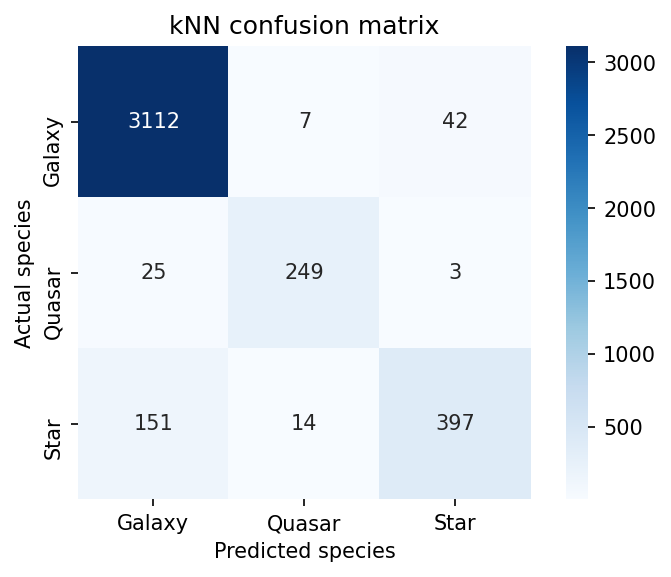

In [188]:
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN confusion matrix');

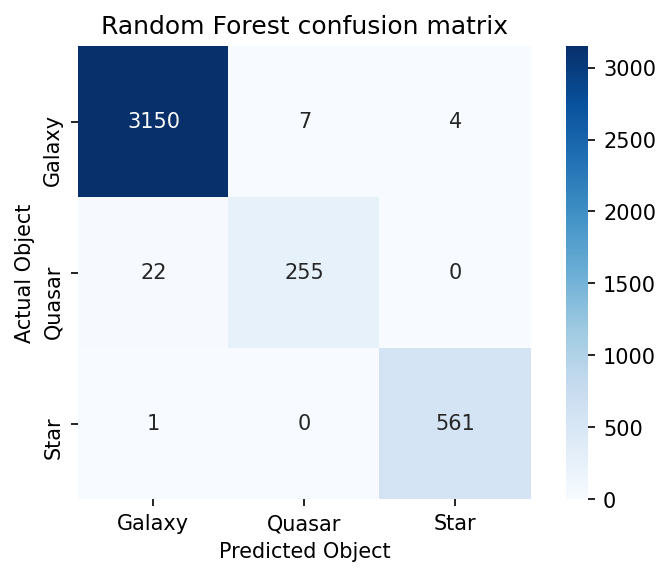

In [189]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

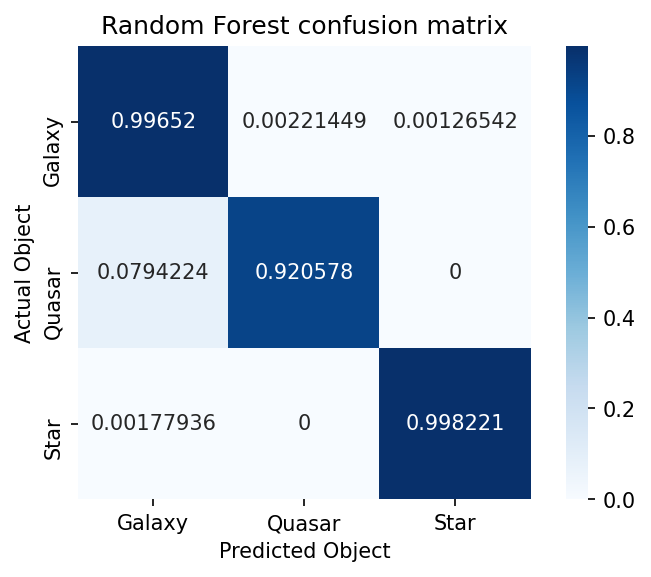

In [190]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test), normalize='true')
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

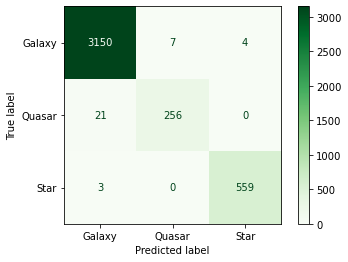

In [54]:
disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

In [277]:
rf.feature_importances_

array([0.0621128 , 0.03622725, 0.04118941, 0.051174  , 0.09425942,
       0.71503712])

In [278]:
feature_importance = {'u': 0.08430072, 'g':0.04835391, 'r': 0.06468642, 'i': 0.06674328, 'z': 0.09957781,
       'redshift': 0.63633785}

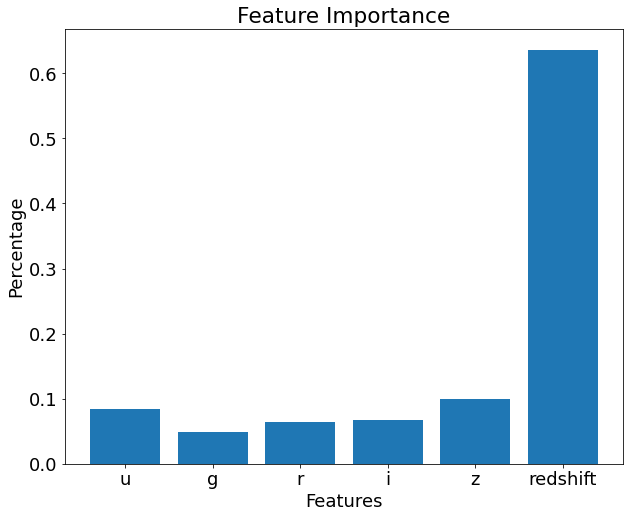

In [319]:
plt.figure(figsize=(10,8))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.title('Feature Importance')
plt.savefig('feature_importance.png',dpi=400)
plt.show()

Redshift is the most important, but all the bands seem to contribute a bit.

### Add distance based on redshift
Note that I later added this column using SQL when downloading the data.

Distance is not used for modeling. It is used for plotting.

In [55]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,class_binary
0,116.913054,44.462788,18.07619,16.28240,15.41487,14.93607,14.55214,1402,6,83,0.053129,1736,53052,583,GALAXY,0.022482,1
1,116.993364,44.460659,20.02562,17.96226,16.90663,16.42047,16.07563,1402,6,83,0.130049,1736,53052,591,GALAXY,0.053097,1
2,117.051430,44.380638,22.66425,20.82059,19.34599,18.18455,17.55428,1402,6,83,-0.000190,1736,53052,594,STAR,-0.000083,0
3,116.988955,44.541149,20.07321,18.39820,17.51262,17.03728,16.67417,1402,6,84,0.053020,1736,53052,597,GALAXY,0.022437,1
4,138.947202,9.235510,19.31722,18.13545,17.69779,17.50732,17.48075,3538,5,142,0.000256,1739,53050,4,STAR,0.000111,0


In [56]:
df['Distance'] = df['redshift']*4280

In [59]:
df['Distance'].describe()

count    20000.000000
mean       804.618003
std       1368.585968
min         -8.510112
25%        242.649047
50%        460.629650
75%        747.194910
max      29713.112480
Name: Distance, dtype: float64

In [60]:
df_neg = df[df['Distance']<0]

In [63]:
df_neg['class'].value_counts()

STAR      1091
GALAXY       4
Name: class, dtype: int64

In [66]:
df3 = pd.read_csv('PhotoSpec3.csv')

In [67]:
df3.head()

,ObjID,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,Distance
0,1237651274038771829,138.268193,60.244893,16.54811,14.97662,14.29888,13.96458,13.82156,1350,6,228,0.003779,1786,54450,43,STAR,0.001638,16.17476
1,1237651274038771878,138.327602,60.265790,19.84578,18.22822,17.41217,16.92843,16.57927,1350,6,228,0.074501,1786,54450,47,GALAXY,0.031207,318.86490
2,1237651540313440283,137.585001,60.037527,17.90654,17.48691,17.39208,17.46770,17.31973,1412,6,25,0.817015,1786,54450,82,QSO,0.259359,3496.82400
3,1237651540313440527,137.624673,60.116218,20.24111,19.60741,19.25177,19.01723,18.92073,1412,6,25,1.675083,1786,54450,91,QSO,0.427337,7169.35600
4,1237651540313440621,137.701070,60.056441,19.36366,18.02443,17.68814,17.62313,17.29083,1412,6,25,0.017243,1786,54450,83,GALAXY,0.007425,73.80074


In [68]:
df3['class'].value_counts()

GALAXY    35958
STAR      10978
QSO        3064
Name: class, dtype: int64

In [72]:
df3[df3['Distance']<0]['class'].value_counts()

STAR      7341
GALAXY       9
Name: class, dtype: int64

In [73]:
stars = df3[df3['class']=='STAR']

In [74]:
stars['Distance'].describe()

count    10978.000000
mean        -0.498329
std          1.644320
min        -17.209240
25%         -1.090755
50%         -0.369004
75%          0.171682
max         17.775930
Name: Distance, dtype: float64

In [75]:
quasars = df3[df3['class']=='QSO']

In [76]:
quasars['Distance'].describe()

count     3064.00000
mean      4530.22564
std       2831.25422
min        144.19460
25%       2186.49075
50%       4585.61150
75%       6587.62875
max      29713.11000
Name: Distance, dtype: float64

In [77]:
galaxies = df3[df3['class']=='GALAXY']

In [79]:
galaxies['Distance'].describe()

count    35958.000000
mean       581.295970
std        434.573639
min         -3.566204
25%        309.970025
50%        461.220850
75%        690.218850
max       4271.332000
Name: Distance, dtype: float64

### Model with just redshift

In [320]:
X = df3['log_redshift']

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [321]:
X.shape

(40000,)

In [19]:
# Necessary since only 1 feature in X
X = X.reshape(-1,1)

In [323]:
X.shape

(40000, 1)

In [324]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]     
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    
#     dt=DecisionTreeClassifier()
#     dt.fit(X_train,y_train)
    
    rf=RandomForestClassifier(n_jobs=-1)
    rf.fit(X_train,y_train)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
    svm=SVC(probability=True)
    svm.fit(X_train,y_train)
    
#     lr=LogisticRegression(solver='liblinear')
#     lr.fit(X_train,y_train)
    
#     knn=KNeighborsClassifier()
#     knn.fit(X_train,y_train)

#     models = {'Naive Bayes': nb, 'SVM':svm, 'Logistic':lr, 'KNN': knn, 'Decision Tree':dt, 'Random Forest':rf}
#     results = {'Naive Bayes': [], 'SVM':[], 'Logistic':[], 'KNN': [], 'Decision Tree':[], 'Random Forest':[]}
    
    
    models = {'Naive Bayes': nb, 'Random Forest':rf}
    results = {'Naive Bayes': [], 'Random Forest':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Naive Bayes
Mean Accuracy: 0.97225

Random Forest
Mean Accuracy: 0.965875



In [325]:
rf.predict(np.array(X_test).reshape(-1,1))

array(['GALAXY', 'GALAXY', 'STAR', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

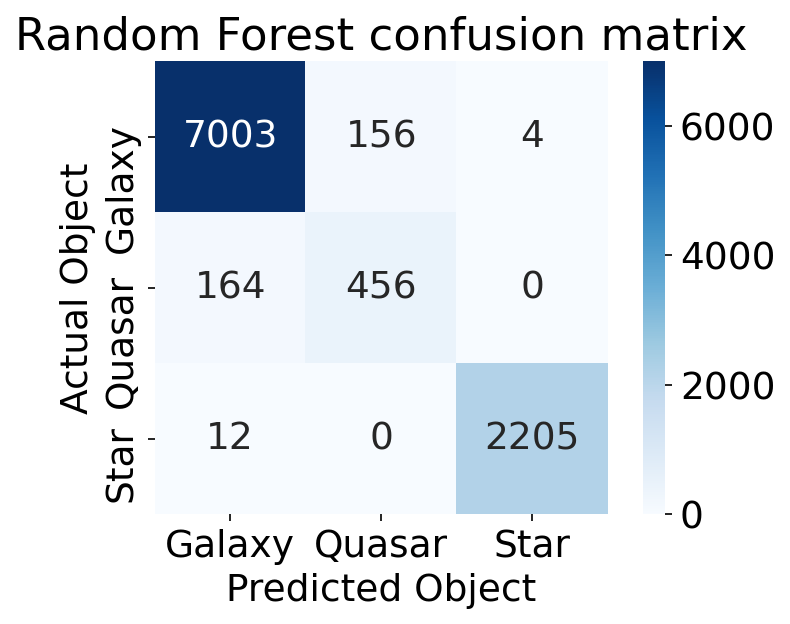

In [326]:
rf_confusion = confusion_matrix(y_test, rf.predict(np.array(X_test).reshape(-1,1)))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

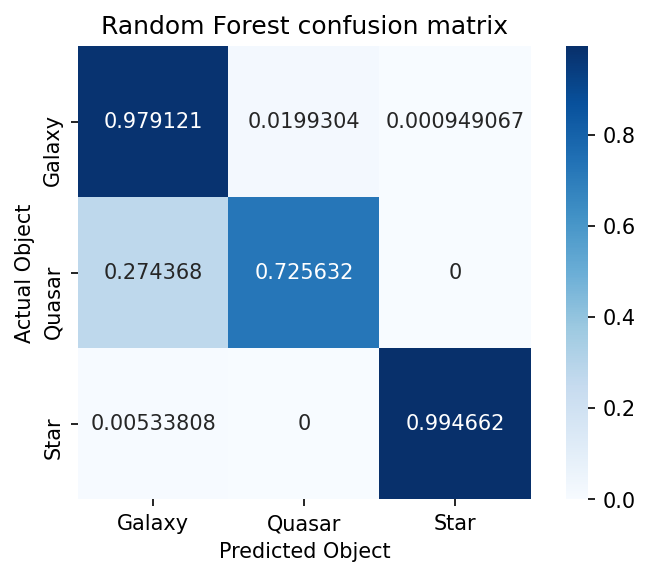

In [178]:
rf_confusion = confusion_matrix(y_test, rf.predict(np.array(X_test).reshape(-1,1)),normalize='true')
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

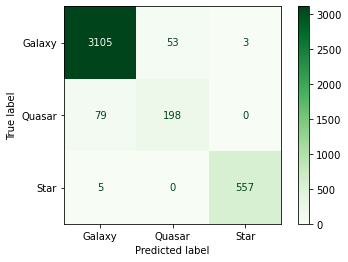

In [116]:
disp = plot_confusion_matrix(rf, np.array(X_test).reshape(-1,1), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

#### NOTE: Above confusion matrix compared to confusion matrix with bands shows that bands do improve the differentiation between quasar and galaxy by several percent. 

### Model with just bands

In [151]:
df3 = pd.read_csv('PhotoSpec3.csv')

In [152]:
df3.head()

,ObjID,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class,log_redshift,Distance
0,1237651274038771829,138.268193,60.244893,16.54811,14.97662,14.29888,13.96458,13.82156,1350,6,228,0.003779,1786,54450,43,STAR,0.001638,16.17476
1,1237651274038771878,138.327602,60.265790,19.84578,18.22822,17.41217,16.92843,16.57927,1350,6,228,0.074501,1786,54450,47,GALAXY,0.031207,318.86490
2,1237651540313440283,137.585001,60.037527,17.90654,17.48691,17.39208,17.46770,17.31973,1412,6,25,0.817015,1786,54450,82,QSO,0.259359,3496.82400
3,1237651540313440527,137.624673,60.116218,20.24111,19.60741,19.25177,19.01723,18.92073,1412,6,25,1.675083,1786,54450,91,QSO,0.427337,7169.35600
4,1237651540313440621,137.701070,60.056441,19.36366,18.02443,17.68814,17.62313,17.29083,1412,6,25,0.017243,1786,54450,83,GALAXY,0.007425,73.80074


In [153]:
X = df3[['u', 'g', 'r', 'i', 'z']]

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [154]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]     
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
    svm=SVC(probability=True)
    svm.fit(X_train,y_train)
    
    lr=LogisticRegression(solver='liblinear')
    lr.fit(X_train,y_train)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    
    models = {'Naive Bayes': nb, 'SVM':svm, 'Logistic':lr, 'KNN': knn, 'Decision Tree':dt, 'Random Forest':rf}
    results = {'Naive Bayes': [], 'SVM':[], 'Logistic':[], 'KNN': [], 'Decision Tree':[], 'Random Forest':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Naive Bayes
Mean Accuracy: 0.738625

SVM
Mean Accuracy: 0.92425

Logistic
Mean Accuracy: 0.806

KNN
Mean Accuracy: 0.93275

Decision Tree
Mean Accuracy: 0.9165

Random Forest
Mean Accuracy: 0.942125



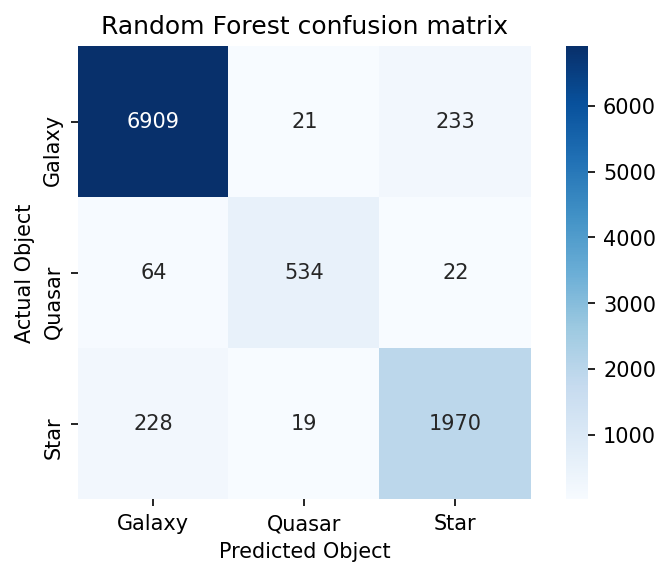

In [155]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

In [156]:
rf.feature_importances_

array([0.21950282, 0.15861552, 0.18732742, 0.18166539, 0.25288885])

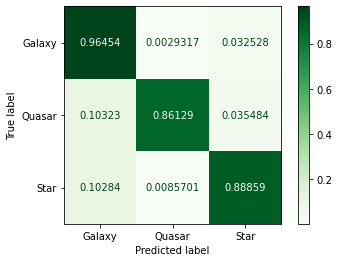

In [169]:
disp = plot_confusion_matrix(rf, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g', normalize='true')


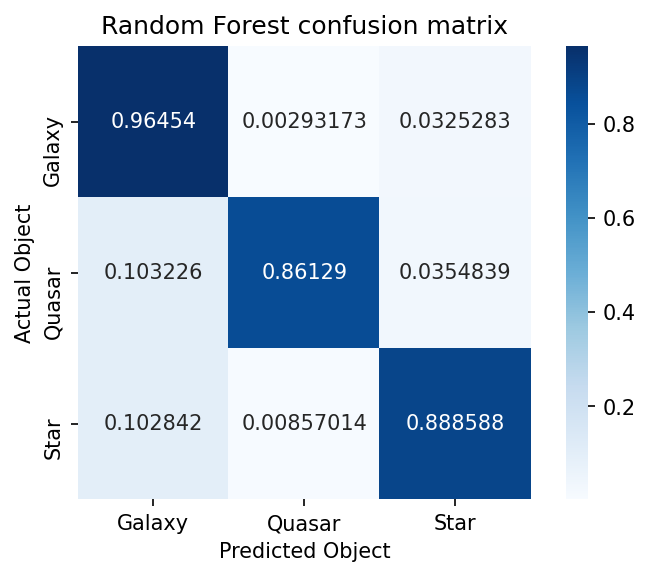

In [170]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test), normalize='true')
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

#### Bands do well without redshift, but not quite as well as redshift by itself. 
Using all together is best.

### Try SMOTE/Oversampling

In [192]:
X = df3[['u', 'g', 'r', 'i', 'z', 'log_redshift']]

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [ ]:
# # setup for the ratio argument of RandomOverSampler initialization
# n_gal = np.sum(y_train == 'GALAXY')
# n_star = np.sum(y_train == 'STAR')
# n_qso = np.sum(y_train == 'QSO')
# ratio = {1 : n_pos * 4, 0 : n_neg} 

In [194]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
    X_train, y_train = X[train_ind], y[train_ind]
    
    X_tr_smote, y_tr_smote = smote.fit_sample(X_train, y_train)
    
    X_val, y_val = X[val_ind], y[val_ind]     
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    rf_smote=RandomForestClassifier()
    rf_smote.fit(X_tr_smote, y_tr_smote)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
    svm=SVC(probability=True)
    svm.fit(X_train,y_train)
    
    lr=LogisticRegression(solver='liblinear')
    lr.fit(X_train,y_train)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    
    models = {'Naive Bayes': nb, 'SVM':svm, 'Logistic':lr, 'KNN': knn, 'Decision Tree':dt, 'Random Forest':rf, 'SMOTE RF': rf_smote}
    results = {'Naive Bayes': [], 'SVM':[], 'Logistic':[], 'KNN': [], 'Decision Tree':[], 'Random Forest':[], 'SMOTE RF':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Naive Bayes
Mean Accuracy: 0.97325

SVM
Mean Accuracy: 0.83575

Logistic
Mean Accuracy: 0.895

KNN
Mean Accuracy: 0.9485

Decision Tree
Mean Accuracy: 0.98575

Random Forest
Mean Accuracy: 0.990375

SMOTE RF
Mean Accuracy: 0.98875



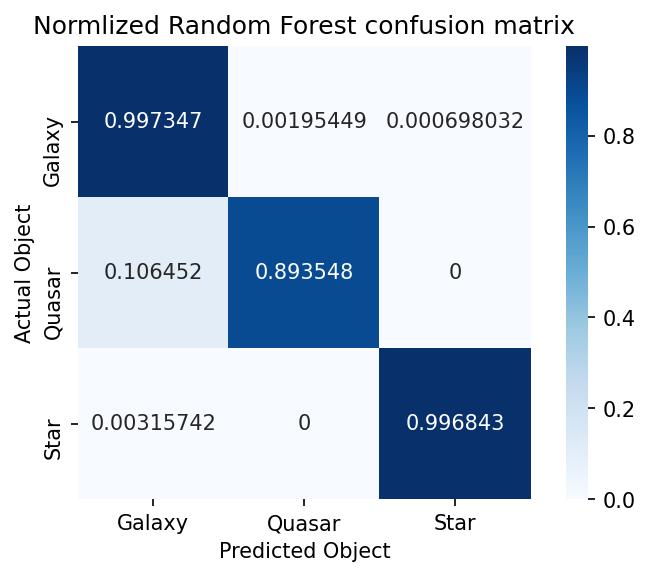

In [203]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test), normalize='true')
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Normlized Random Forest confusion matrix');

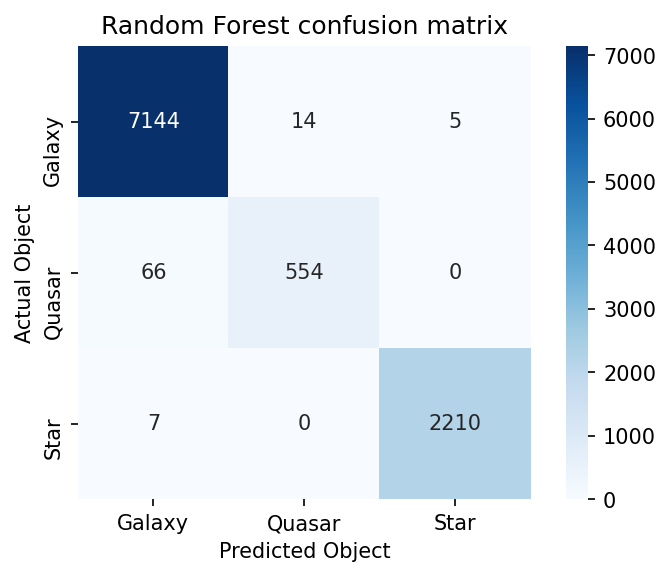

In [202]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('Random Forest confusion matrix');

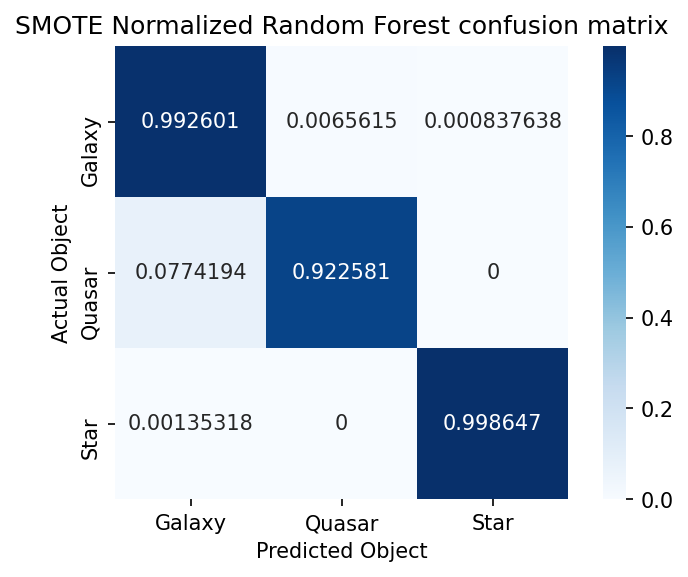

In [200]:
rf_confusion = confusion_matrix(y_test, rf_smote.predict(X_test), normalize='true')
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('SMOTE Normalized Random Forest confusion matrix');

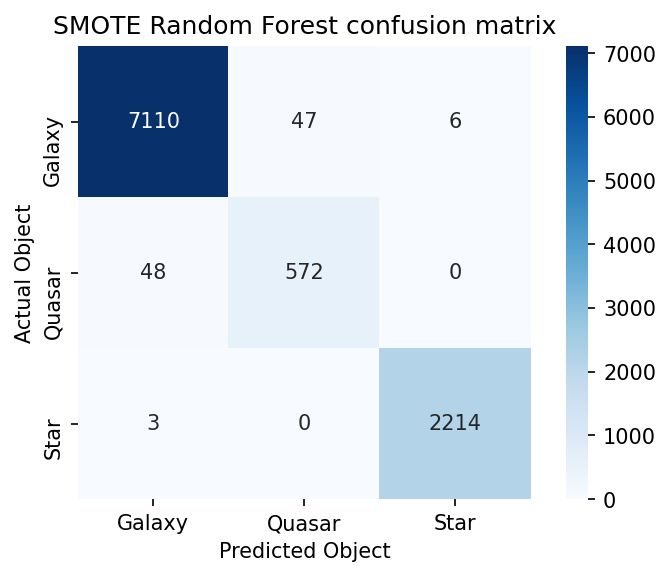

In [199]:
rf_confusion = confusion_matrix(y_test, rf_smote.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Galaxy', 'Quasar', 'Star'],
           yticklabels=['Galaxy', 'Quasar', 'Star'])

plt.xlabel('Predicted Object')
plt.ylabel('Actual Object')
plt.title('SMOTE Random Forest confusion matrix');

#### SMOTE did not help the model overall, but it did increase the accuracy for quasars at the expense of accuracy for galaxies.

In [208]:
blah_df = pd.DataFrame(X_tr_smote)

In [209]:
blah_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69108 entries, 0 to 69107
Data columns (total 6 columns):
0    69108 non-null float64
1    69108 non-null float64
2    69108 non-null float64
3    69108 non-null float64
4    69108 non-null float64
5    69108 non-null float64
dtypes: float64(6)
memory usage: 3.2 MB


In [212]:
blah_y = pd.Series(y_tr_smote)

(array([23036.,     0.,     0.,     0.,     0., 23036.,     0.,     0.,
            0., 23036.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

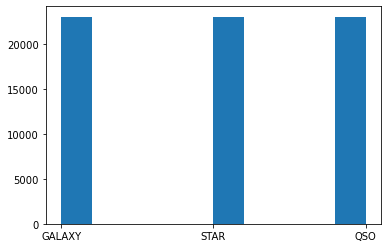

In [215]:
plt.hist(y_tr_smote)

I just wanted to make sure SMOTE was balancing the classes since I didn't get any increase in overall accuracy.

### Try hyperparameter tuning

In [217]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [218]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

In [219]:
X = df3[['u', 'g', 'r', 'i', 'z', 'log_redshift']]

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

# #this helps with the way kf will generate indices below
# X, y = np.array(X), np.array(y)

In [221]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [222]:
rf_random.fit(X, y)

e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [223]:
rf_random.best_params_

{'n_estimators': 1600, 'max_features': 'auto'}

In [235]:
X = df3[['u', 'g', 'r', 'i', 'z', 'log_redshift']]

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [236]:
skf = StratifiedKFold(shuffle=True)

for train_ind, val_ind in skf.split(X,y):
    
    smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
    X_train, y_train = X[train_ind], y[train_ind]
    
    X_tr_smote, y_tr_smote = smote.fit_sample(X_train, y_train)
    
    X_val, y_val = X[val_ind], y[val_ind]     
    
#     nb=GaussianNB()
#     nb.fit(X_train,y_train)
    
#     dt=DecisionTreeClassifier()
#     dt.fit(X_train,y_train)

    rf=RandomForestClassifier(n_jobs=-1)
    rf.fit(X_train,y_train)
    
    rf_smote=RandomForestClassifier(n_jobs=-1)
    rf_smote.fit(X_tr_smote, y_tr_smote)
    
    rf2=RandomForestClassifier(n_estimators=1600, n_jobs=-1)
    rf2.fit(X_train,y_train)
    
    rf_smote2=RandomForestClassifier(n_estimators=1600, n_jobs=-1)
    rf_smote2.fit(X_tr_smote, y_tr_smote)
    
    
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
#     svm=SVC(probability=True)
#     svm.fit(X_train,y_train)
    
#     lr=LogisticRegression(solver='liblinear')
#     lr.fit(X_train,y_train)
    
#     knn=KNeighborsClassifier()
#     knn.fit(X_train,y_train)
    
    
    models = {'Random Forest':rf, 'SMOTE RF': rf_smote, 'Random Forest 2':rf2, 'SMOTE RF 2': rf_smote2}
    results = {'Random Forest':[], 'SMOTE RF':[], 'Random Forest 2':[], 'SMOTE RF 2':[]}
    
    for name, model in models.items():
        results[name].append(accuracy_score(y_val, model.predict(X_val)))
        
for name, result in results.items():
    print(name)
    print(f'Mean Accuracy: {np.mean(result)}\n')
#     print('\n')
    
    
    

Random Forest
Mean Accuracy: 0.991125

SMOTE RF
Mean Accuracy: 0.987875

Random Forest 2
Mean Accuracy: 0.991

SMOTE RF 2
Mean Accuracy: 0.988



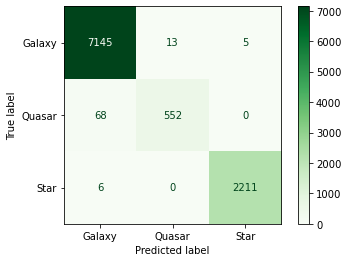

In [241]:
disp = plot_confusion_matrix(rf, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')


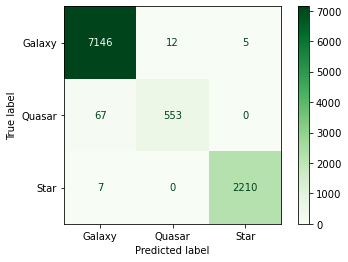

In [242]:
disp = plot_confusion_matrix(rf2, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')


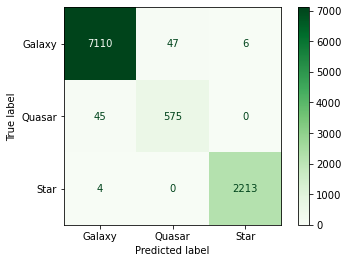

In [243]:
disp = plot_confusion_matrix(rf_smote, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')


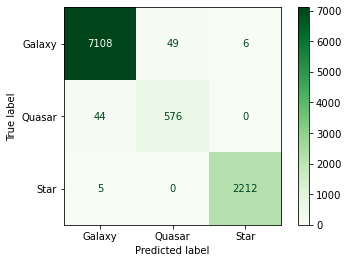

In [244]:
disp = plot_confusion_matrix(rf_smote2, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')


#### Hyperparameter tuning didn't really do much as far as I can tell. I only did it for two parameters though. 

### Model and validate on test

In [245]:
X = df3[['u', 'g', 'r', 'i', 'z', 'log_redshift']]

y = df3['class']


#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

In [246]:
smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
X_smote, y_smote = smote.fit_sample(X, y)
    
rf=RandomForestClassifier(n_jobs=-1)
rf.fit(X,y)

rf_smote=RandomForestClassifier(n_jobs=-1)
rf_smote.fit(X_smote, y_smote)

rf2=RandomForestClassifier(n_estimators=1600, n_jobs=-1)
rf2.fit(X,y)

rf_smote2=RandomForestClassifier(n_estimators=1600, n_jobs=-1)
rf_smote2.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [248]:
models = {'Random Forest':rf, 'SMOTE RF': rf_smote, 'Random Forest 2':rf2, 'SMOTE RF 2': rf_smote2}

for name, model in models.items():
    print(name)
    print(accuracy_score(y_test, model.predict(X_test)))
    print('\n')

Random Forest
0.992


SMOTE RF
0.9905


Random Forest 2
0.9913


SMOTE RF 2
0.9906




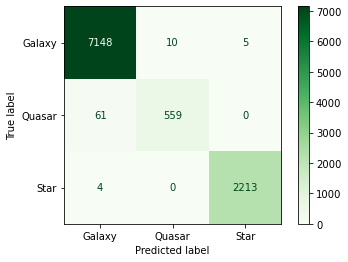

In [249]:
disp = plot_confusion_matrix(rf, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

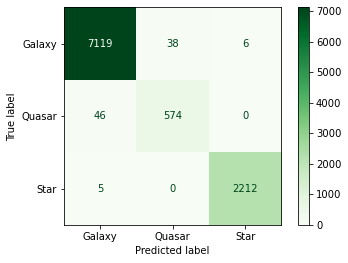

In [250]:
disp = plot_confusion_matrix(rf_smote, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')


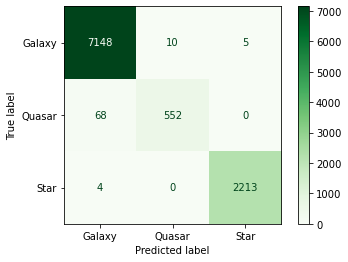

In [251]:
disp = plot_confusion_matrix(rf2, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

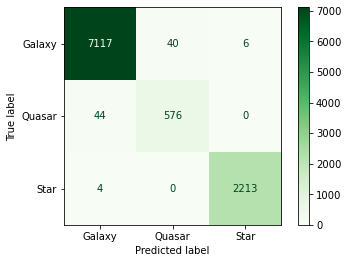

In [253]:
disp = plot_confusion_matrix(rf_smote2, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

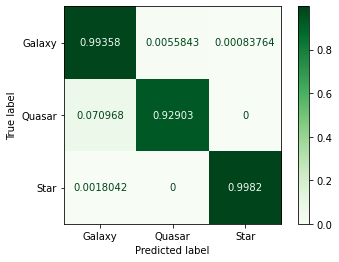

In [254]:
disp = plot_confusion_matrix(rf_smote2, np.array(X_test), y_test,
                                 display_labels=['Galaxy', 'Quasar', 'Star'],
                                 cmap=plt.cm.Greens, values_format = '.5g', normalize='true')